## Image from Text and Init Image

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import io
import os
import warnings

from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation

<IPython.core.display.Javascript object>

In [3]:
STABILITY_API_KEY = os.environ.get("STABILITY_API_KEY")

<IPython.core.display.Javascript object>

In [4]:
stability_api = client.StabilityInference(
    key=STABILITY_API_KEY, verbose=False, engine="stable-diffusion-v1-5",
)

<IPython.core.display.Javascript object>

#### start_schedule
- Skips a proportion of the start of the diffusion steps, allowing the init_image
 to influence the final generated image. 
- Lower values will result in more influence from the init_image
- Higher values will result in more influence from the diffusion steps. 
- A value of 0 would simply return you the  init_image
- A value of 1 would return you a completely different image


In [5]:
response = stability_api.generate(
    prompt="a rocket-ship launching from rolling greens with blue daisies and weeping willow trees under a blue alien skysterful,, artstation, ma ghibli",
    seed=892226758,
    steps=30,
    cfg_scale=8.0,
    width=512,
    height=512,
    sampler=generation.SAMPLER_K_DPMPP_2M,
)

<IPython.core.display.Javascript object>

image file name:  images/image_892226758.png


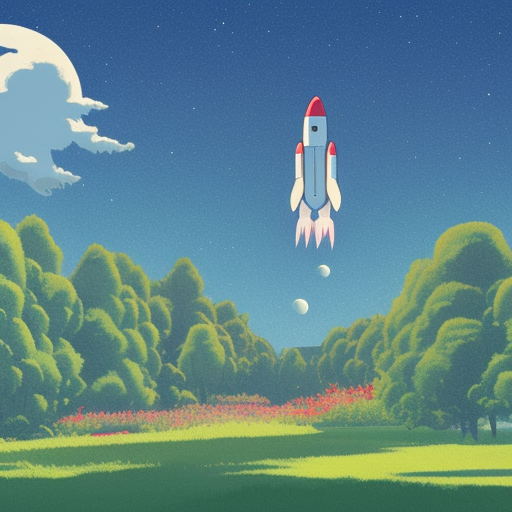

<IPython.core.display.Javascript object>

In [6]:
for resp in response:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn("Safety filters activated")
        if artifact.type == generation.ARTIFACT_IMAGE:
            file_name = "images/image_" + str(artifact.seed) + ".png"
            print("image file name: ", file_name)
            with open(file_name, "wb") as image_file:
                image_file.write(artifact.binary)
            img = Image.open(io.BytesIO(artifact.binary))
            display(img)

In [7]:
response2 = stability_api.generate(
    prompt="sketchy crayon outline on old paper of a rocket-ship launching from rolling greens with blue daisies and weeping willow trees under a blue alien sky",
    init_image=img,
    start_schedule=0.6,
    seed=123467458,
    steps=30,
    cfg_scale=8.0,
    width=512,
    height=512,
    sampler=generation.SAMPLER_K_DPMPP_2M,
)

<IPython.core.display.Javascript object>

image file name:  images/image_123467458.png


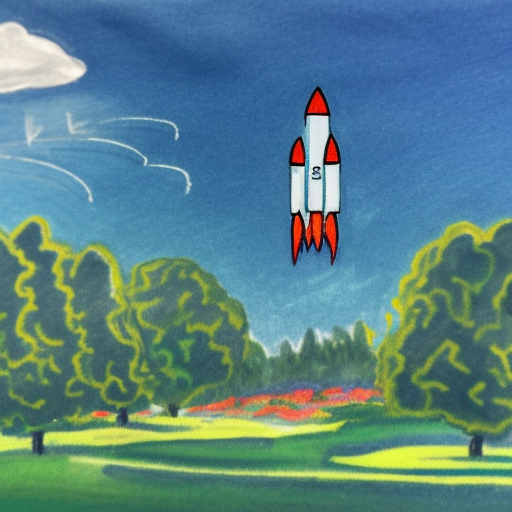

<IPython.core.display.Javascript object>

In [8]:
for resp in response2:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn("Safety filters activated")
        if artifact.type == generation.ARTIFACT_IMAGE:
            file_name = "images/image_" + str(artifact.seed) + ".png"
            print("image file name: ", file_name)
            with open(file_name, "wb") as image_file:
                image_file.write(artifact.binary)
            img2 = Image.open(io.BytesIO(artifact.binary))
            display(img2)